In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from connectivity import figures
from connectivity import visualize as vis
from connectivity import constants as const

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/maedbhking/.local/share/virtualenvs/cerebellum_connectivity-DbxULmID/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
# load train data

df_train = vis.get_summary(
            summary_type='train',
            exps=['sc1'],
            atlas=['tessels'],
            method=['WTA', 'ridge', 'lasso']
            )

In [3]:
# set plotting summary

vis.plotting_style()

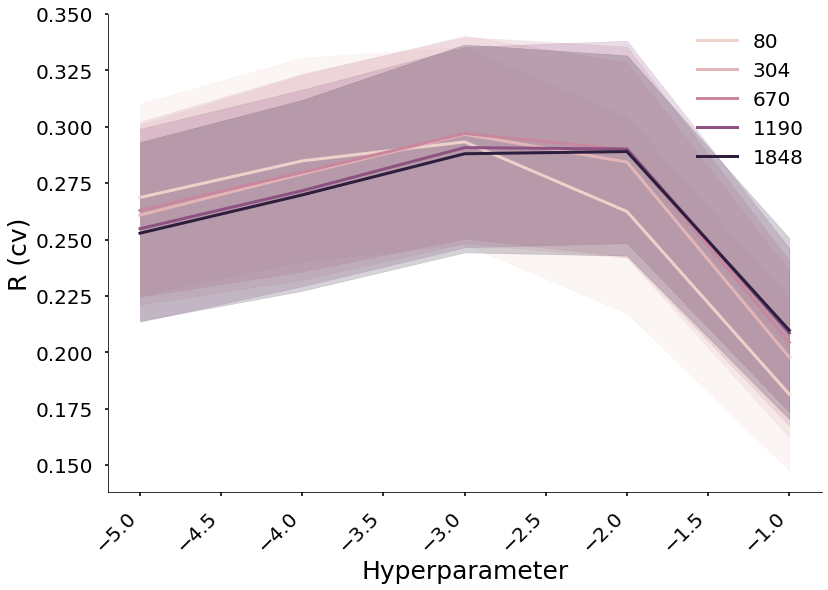

In [18]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train.query('method=="lasso"'),
                          x='hyperparameter',
                          hue='num_regions',
                          save=True
                          ) 
plt.xlabel('Hyperparameter');
dirs = const.Dirs()
plt.savefig(os.path.join(dirs.figure, 'train_predictions_lasso.png'), pad_inches=0.1, bbox_inches='tight')

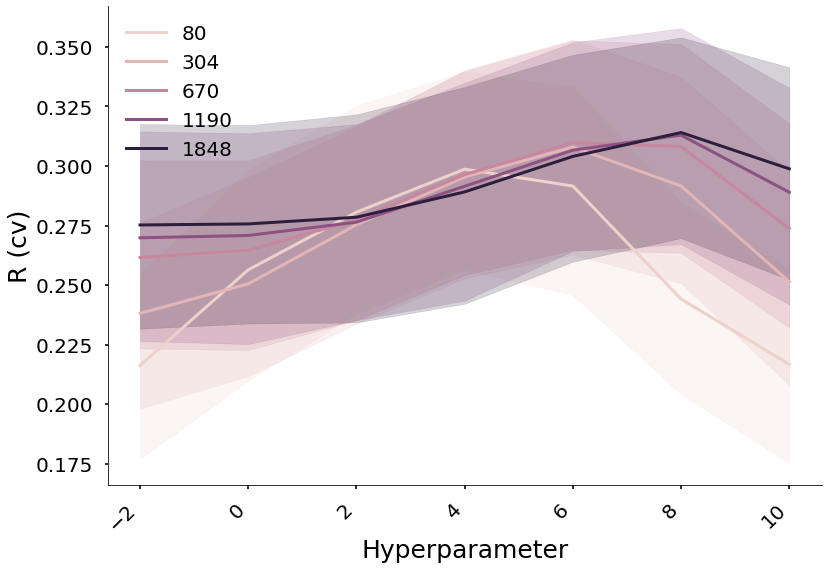

In [17]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train.query('method=="ridge"'),
                          x='hyperparameter',
                          hue='num_regions'
                          ) 
plt.xlabel('Hyperparameter');
dirs = const.Dirs()
plt.savefig(os.path.join(dirs.figure, 'train_predictions_ridge.png'), pad_inches=0.1, bbox_inches='tight')

In [8]:
# train predictions (R CV: hyperparameter)

# vis.plot_train_predictions(dataframe=df_train,
#                           x='num_regions',
#                           hue='model',
#                           best_models=True) 
# plt.xlabel('# of regions');

Ttest_relResult(statistic=-11.98240697960286, pvalue=2.2758495478027496e-11)


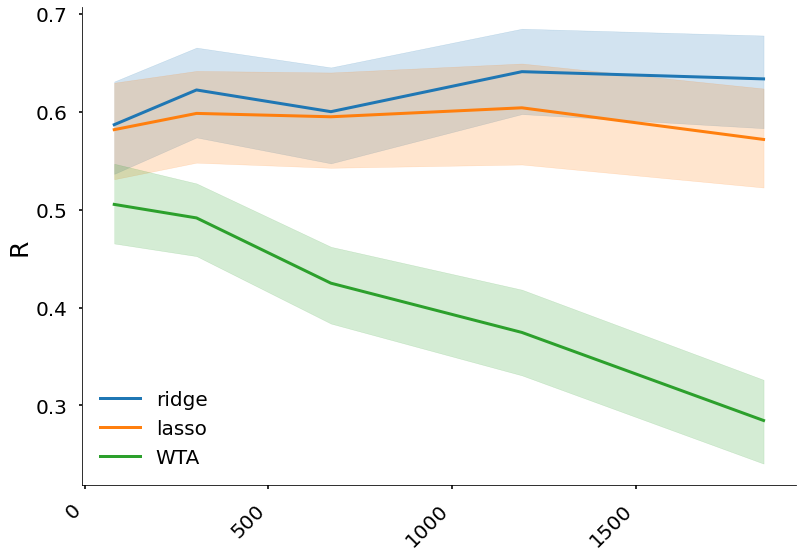

In [24]:
# EVAL predictions (R)

# load eval data

df_eval =  vis.get_summary(
            summary_type='eval',
            exps=['sc2'],
            summary_name=['weighted_all'],
            atlas=['tessels'],
            method=['WTA', 'ridge', 'lasso']
            )

Ttest_relResult(statistic=-15.37177079787486, pvalue=1.3682296406409816e-13)


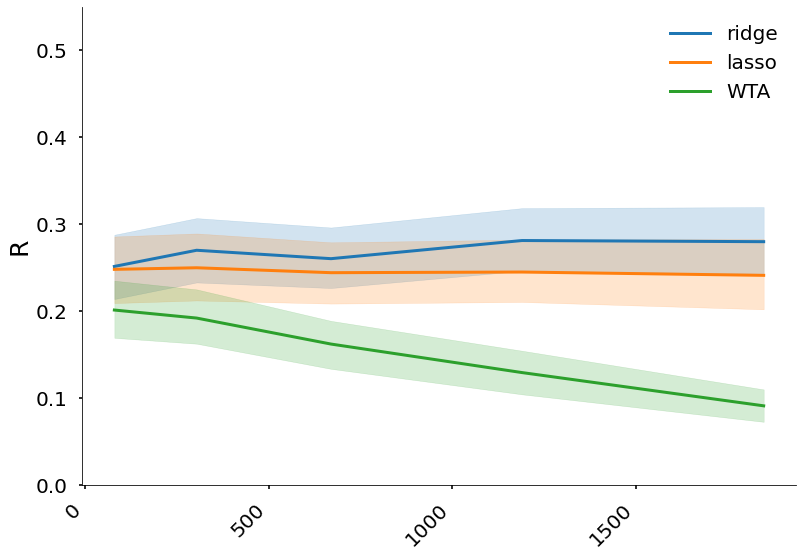

In [32]:
# NO NOISE CEILING OR NORMALIZATION

vis.plot_eval_predictions(dataframe=df_eval,
                        normalized=False,
                        plot_noiseceiling=False,
                        x='num_regions', 
                        hue='method', 
                        )
plt.xticks([0, 500, 1000, 1500]);
dirs = const.Dirs()
plt.ylim([0, 0.55])
plt.savefig(os.path.join(dirs.figure, 'eval_predictions_weighted_all.png'), pad_inches=0.1, bbox_inches='tight')


Ttest_relResult(statistic=-15.37177079787486, pvalue=1.3682296406409816e-13)


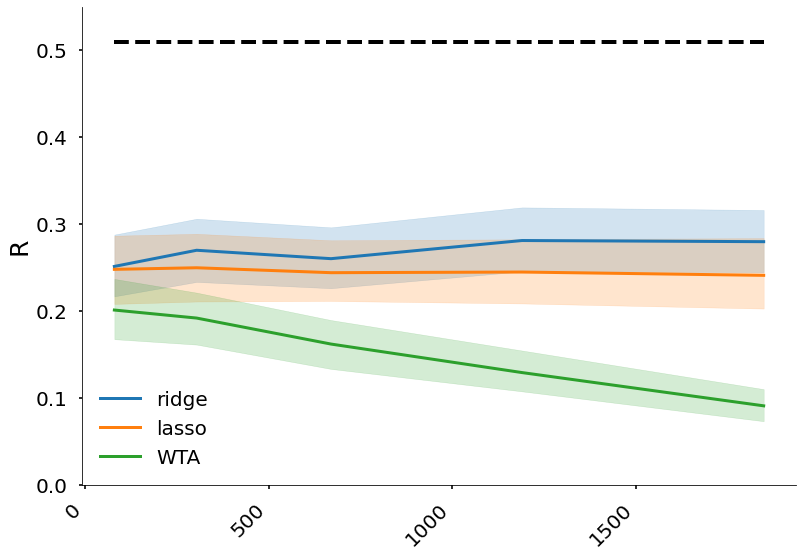

In [33]:
# NO NOISECEILING (OR NORMALIZATION)

vis.plot_eval_predictions(dataframe=df_eval,
                        normalized=False,
                        plot_noiseceiling=True,
                        x='num_regions', 
                        hue='method', 
                        )
plt.xticks([0, 500, 1000, 1500]);
dirs = const.Dirs()
plt.ylim([0, 0.55])
plt.savefig(os.path.join(dirs.figure, 'eval_predictions_weighted_all_noiseceiling_Y.png'), pad_inches=0.1, bbox_inches='tight')


Ttest_relResult(statistic=-11.98240697960286, pvalue=2.2758495478027496e-11)


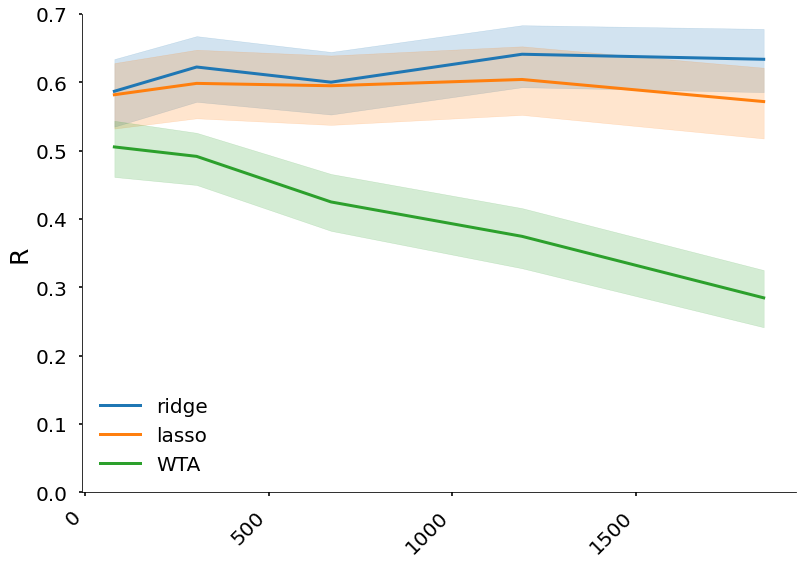

In [35]:
# PLOT Y NOISECEILING

vis.plot_eval_predictions(dataframe=df_eval,
                        normalized=True,
                        plot_noiseceiling=False,
                        x='num_regions', 
                        hue='method', 
                        )
plt.xticks([0, 500, 1000, 1500]);
dirs = const.Dirs()
plt.ylim([0, 0.7])
plt.savefig(os.path.join(dirs.figure, 'eval_predictions_weighted_all_normalized_XY.png'), pad_inches=0.1, bbox_inches='tight')




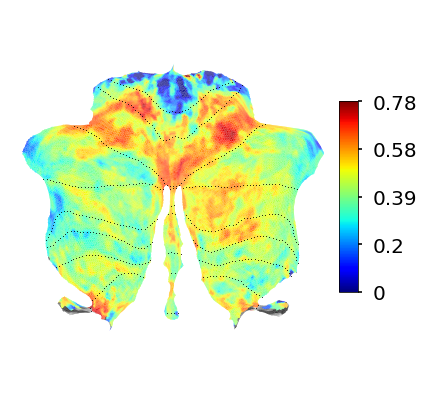

In [60]:
# plot eval map (R)

outpath = os.path.join(dirs.figure, 'map_R_lasso_tessels1002_normalized.png')

vis.map_eval_cerebellum(data="R", 
            exp="sc1", 
            model_name='lasso_tessels1002_alpha_-2', 
            method='lasso',
            normalize=True,
            colorbar=True,
            title=False,
            outpath=outpath,
            cscale=[0, 0.78]
            )

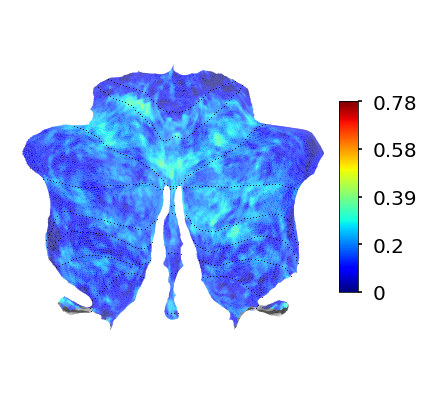

In [61]:
outpath = os.path.join(dirs.figure, 'map_R_WTA_tessels1002_normalized.png')

vis.map_eval_cerebellum(data="R", 
            exp="sc1", 
            model_name='WTA_tessels1002', 
            method='WTA',
            normalize=True,
            colorbar=True,
            title=False,
            outpath=outpath,
            cscale=[0, 0.78]
            )

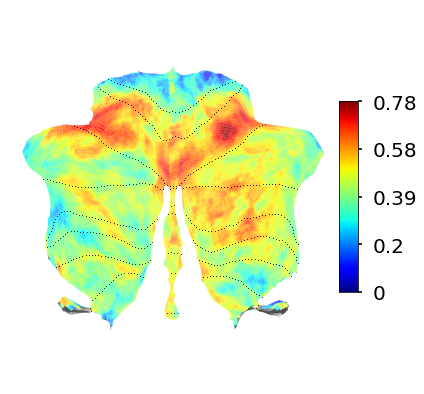

In [62]:
outpath = os.path.join(dirs.figure, 'map_R_ridge_tessels1002_normalized.png')

vis.map_eval_cerebellum(data="R", 
            exp="sc1", 
            model_name='ridge_tessels1002_alpha_8', 
            method='ridge',
            normalize=True,
            colorbar=True,
            title=False,
            outpath=outpath,
            cscale=[0, 0.78]
            )

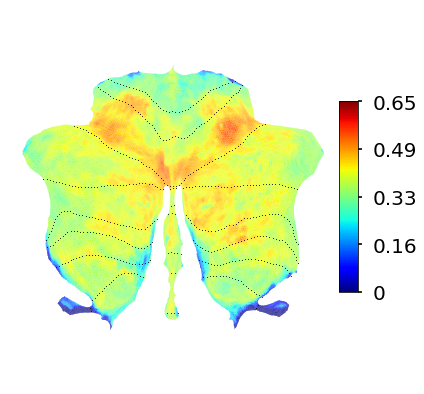

In [68]:
# plot noiseceiling (R) - WTA XY

outpath = os.path.join(dirs.figure, 'map_noiseceiling_XY_WTA_tessels1002.png')

vis.map_eval_cerebellum(data="noiseceiling_XY_R", 
            exp="sc1", 
            model_name='WTA_tessels1002', 
            method='WTA',
            colorbar=True,
            outpath=outpath,
            title=False,
            cscale=[0, 0.65]
            )

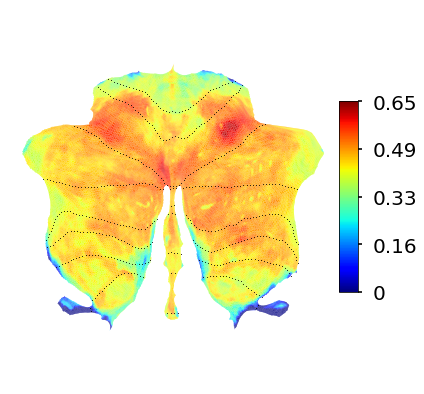

In [64]:
# plot noiseceiling (R) - ridge XY

outpath = os.path.join(dirs.figure, 'map_noiseceiling_XY_ridge_tessels1002.png')

vis.map_eval_cerebellum(data="noiseceiling_XY_R", 
            exp="sc1", 
            model_name='ridge_tessels1002_alpha_8', 
            method='ridge',
            colorbar=True,
            outpath=outpath,
            cscale=[0, 0.65],
            title=False
            )

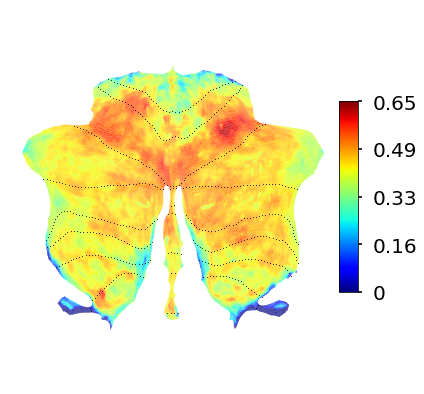

In [67]:
# plot noiseceiling (R) - lasso XY

outpath = os.path.join(dirs.figure, 'map_noiseceiling_XY_lasso_tessels1002.png')

vis.map_eval_cerebellum(data="noiseceiling_XY_R", 
            exp="sc1", 
            model_name='lasso_tessels1002_alpha_-2', 
            method='ridge',
            colorbar=True,
            outpath=outpath,
            cscale=[0, 0.65],
            title=False
            )

best model is lasso_tessels0362_alpha_-3


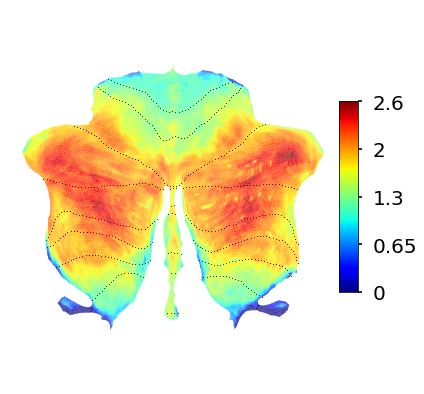

In [69]:
# plot lasso map

outpath = os.path.join(dirs.figure, 'map_lasso_surface_voxels.png')


vis.map_lasso_cerebellum(model_name='best_model',
            exp="sc1", 
            stat='percent', # percent
            outpath=outpath,
            colorbar=True)

In [6]:
# map distances

for num in np.arange(10):
    
    vis.map_distances_cortex(model_name='best_model',
                    method='lasso',
                    atlas='MDTB10',
                    surf='inflated',
                    threshold=100,
                    column=num,
                    outpath=None
                    )

best model is lasso_tessels0362_alpha_-3


FileNotFoundError: No such file or no access: '/Users/maedbhking/Documents/cerebellum_connectivity/data/sc1/conn_models/train/lasso_tessels0362_alpha_-3/group_MDTB10_threshold_100.L.func.gii'

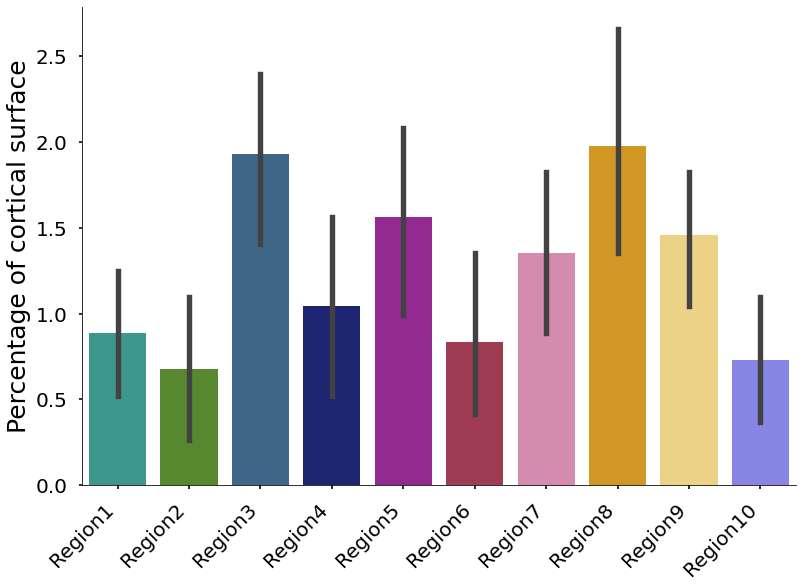

<Figure size 921.6x633.6 with 0 Axes>

In [303]:
# plot surfaces

ax = vis.plot_surfaces(x='reg_names',
                  hue=None,
                  cortex='tessels0042', 
                  method='lasso',
                  regions=None);
plt.savefig(os.path.join(dirs.figure, 'cortical_surfaces_all.png'), pad_inches=0.1, bbox_inches='tight')


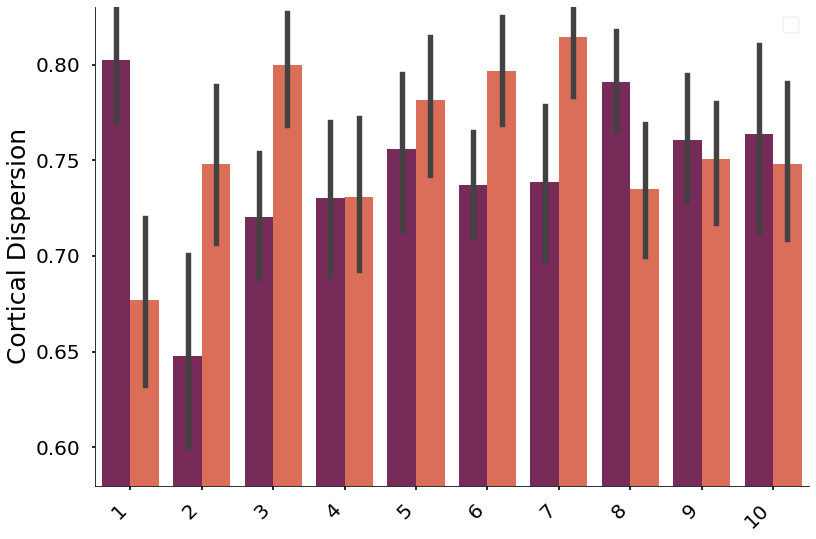

In [306]:
# plot dispersion

vis.plot_dispersion(
    y='var_w', 
    hue='hem',
    cortex='tessels0042', 
    atlas='MDTB10',
    regions=None,
    );
plt.ylim([0.58, .83]);
plt.legend({'Left Hem', 'Right Hem'})
plt.savefig(os.path.join(dirs.figure, 'cortical_dispersion_all.png'), pad_inches=0.1, bbox_inches='tight')



In [12]:
models, names = vis.get_best_models(df_train)

models

['WTA_tessels0042',
 'lasso_tessels0042_alpha_-3',
 'ridge_tessels0042_alpha_4',
 'WTA_tessels0162',
 'lasso_tessels0162_alpha_-3',
 'ridge_tessels0162_alpha_6',
 'WTA_tessels0362',
 'lasso_tessels0362_alpha_-3',
 'ridge_tessels0362_alpha_6',
 'WTA_tessels0642',
 'lasso_tessels0642_alpha_-3',
 'ridge_tessels0642_alpha_8',
 'WTA_tessels1002',
 'lasso_tessels1002_alpha_-2',
 'ridge_tessels1002_alpha_8']